In [1]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from DynGenModels.models.mlp import MLP
from DynGenModels.configs.toys_configs import ToysMLPConfig

#...define hyperparameters:

configs = ToysMLPConfig(data_name = '8gauss_to_2moons',
                        features = ['x', 'y'],
                        num_samples = 20000,
                        sigma = 0.0,
                        gauss_8_scale = 5,
                        gauss_8_var = 0.1,
                        moon_2_noise = 0.1,
                        data_split_fracs = [0.7, 0.2, 0.1],
                        epochs = 1000,
                        early_stopping=1000,
                        batch_size = 256,
                        warmup_epochs = 50,
                        print_epochs = 100,
                        lr = 1e-4,
                        dim_hidden = 64, 
                        device = 'cpu',
                        solver='dopri5',
                        num_sampling_steps=100,
                        seed = 1234
                        )

#...run experiment:

from DynGenModels.datamodules.fermi.datasets import FermiDataset
from DynGenModels.datamodules.toys.datasets import ToysDataset
from DynGenModels.datamodules.toys.dataloader import ToysDataLoader
from DynGenModels.dynamics.flowmatch import SimplifiedCondFlowMatching
from DynGenModels.pipelines.FlowMatchPipeline import FlowMatchPipeline
from DynGenModels.pipelines.utils import RunFlowPipeline

toys = RunFlowPipeline(workdir='../results',
                        dataset=ToysDataset,
                        dataloader=ToysDataLoader,
                        net=MLP,
                        configs=configs,
                        dynamics=SimplifiedCondFlowMatching,
                        pipeline=FlowMatchPipeline
                        )  

#============================================================================
INFO: created directory: ../results/MLP.8gauss_to_2moons_2023.09.26_21h03__1
#============================================================================
+--------------------+------------------+
| Key                | Value            |
+--------------------+------------------+
| data_name          | 8gauss_to_2moons |
| features           | ['x', 'y']       |
| num_samples        | 20000            |
| gauss_8_scale      | 5                |
| gauss_8_var        | 0.1              |
| moon_2_noise       | 0.1              |
| device             | cpu              |
| data_split_fracs   | [0.7, 0.2, 0.1]  |
| batch_size         | 256              |
| epochs             | 1000             |
| early_stopping     | 1000             |
| warmup_epochs      | 50               |
| print_epochs       | 100              |
| lr                 | 0.0001           |
| seed               | 1234             |
| solver   

epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

	 test loss: 0.05998558568954468  (min loss: 0.05998558568954468)
	 test loss: 0.03946152329444885  (min loss: 0.03836706328392029)
	 test loss: 0.0372059166431427  (min loss: 0.03712068200111389)
	 test loss: 0.036698492407798766  (min loss: 0.0357469584941864)
	 test loss: 0.03639638090133667  (min loss: 0.03524422025680542)
	 test loss: 0.035496891736984254  (min loss: 0.03520698082447052)
	 test loss: 0.035569542527198794  (min loss: 0.03484182488918305)
	 test loss: 0.036870359897613524  (min loss: 0.0345397881269455)
	 test loss: 0.03592264103889466  (min loss: 0.0345397881269455)
	 test loss: 0.03611294889450073  (min loss: 0.03444017899036408)


sampling:   0%|          | 0/8 [00:00<?, ?it/s]

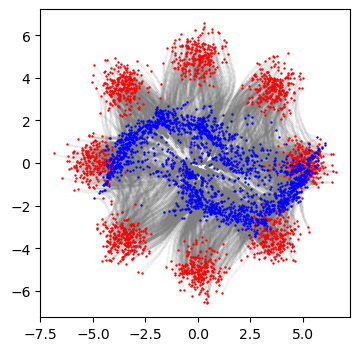

In [4]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
for i in range(configs.num_sampling_steps): 
    plt.scatter(toys.trajectories[i][:,0], toys.trajectories[i][:,1], s=0.05, color='gray', alpha=0.2)
plt.scatter(toys.trajectories[0][:,0], toys.trajectories[0][:,1], s=0.5, color='red')
plt.scatter(toys.trajectories[-1][:,0], toys.trajectories[-1][:,1], s=0.5, color='blue')

plt.show()

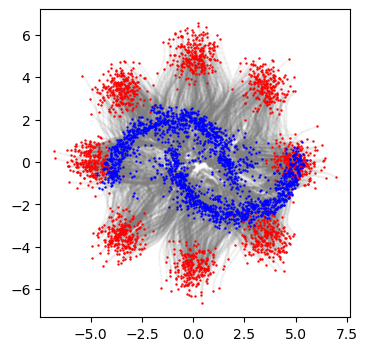